In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import  WordCloud, STOPWORDS

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [59]:
df = pd.read_csv("dataset/instagram_reach.csv")
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [60]:
df.shape

(100, 8)

In [61]:
df.drop(["Unnamed: 0","USERNAME", "S.No"],axis=1, inplace=True)

In [62]:
df.head()

,Caption,Followers,Hashtags,Time since posted,Likes
0,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [63]:
stop_words = set(stopwords.words(fileids='english'))

def preprocessor(text):
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Tokenize the text using a regex pattern to preserve punctuation
    #tokenizer = RegexpTokenizer(r'\w+')
    #tokens = tokenizer.tokenize(text)
    
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    
    # Join tokens back into a sentence
    processed_text = ' '.join(tokens)
    
    return processed_text

In [64]:
df['Caption'] =  df["Caption"].apply(lambda caption: preprocessor(text= str(caption)))

df['Hashtags'] =  df["Hashtags"].apply(lambda hashtag: preprocessor(text= str(hashtag)))

In [65]:
# function definition for cloud creation
def create_world_cloud(df, column):

    text = df[column].values
    # Create a WordCloud object
    wordcloud = WordCloud(width=1000, height=600,
                          background_color='white',
                          max_words=209527,
                          stopwords=STOPWORDS,
                          random_state=2023).generate(str(text))

    # Display the word cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{str(column).upper()} Cloud\n")
    plt.show()
    


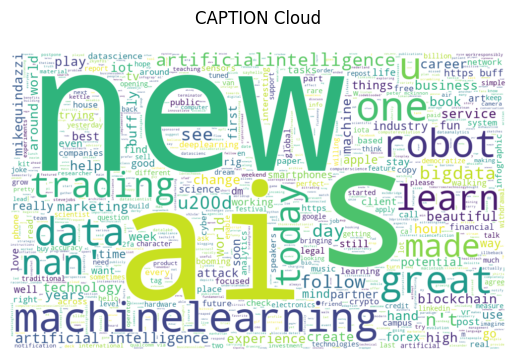

In [66]:
create_world_cloud(df,"Caption")

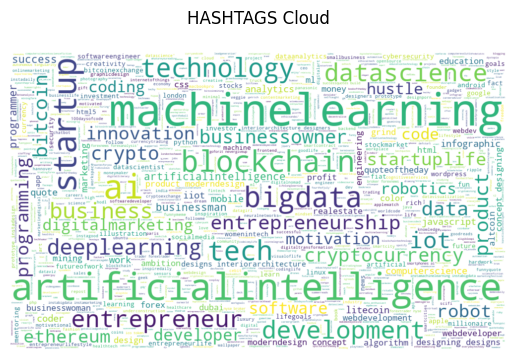

In [67]:
create_world_cloud(df,"Hashtags")

In [71]:
df['Caption + Hashtag'] = df['Caption'] + df['Hashtags']
df['Caption + Hashtag'] = df['Caption + Hashtag'].apply(lambda x: preprocessor(text=x))

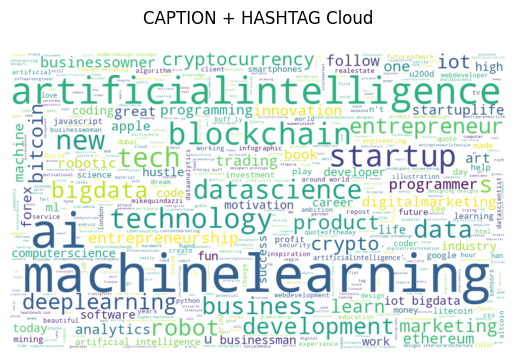

In [72]:
create_world_cloud(df,'Caption + Hashtag')